In [1]:
%load_ext autoreload
%autoreload 2

import os
import xarray as xr
import numpy as np
import geopandas as gpd
import pandas as pd

from geoglue.memoryraster import MemoryRaster
from geoglue.era5 import ERA5, ERA5Aggregated

era5_file = "../79a080c8aaa9b3f1d4808e650202035c.nc"
population_highres = MemoryRaster.read("../data/vnm_ppp_2020_UNadj_constrained.tif", crs="EPSG:4326")

In [2]:
era5 = ERA5(era5_file, "VNM", admin_level=2, statistic="daily_mean")
era5

ERA5 VNM admin_level=2 statistic=daily_mean
filename  = '../79a080c8aaa9b3f1d4808e650202035c.nc'
variables = 2m_temperature

In [3]:
era5.set_population(population_highres)

Resampling using: 13


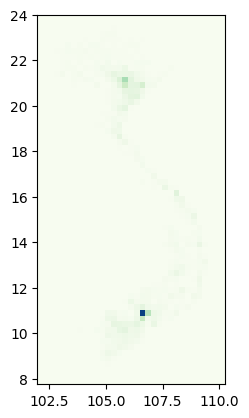

<Axes: >

In [4]:
era5.population.plot()

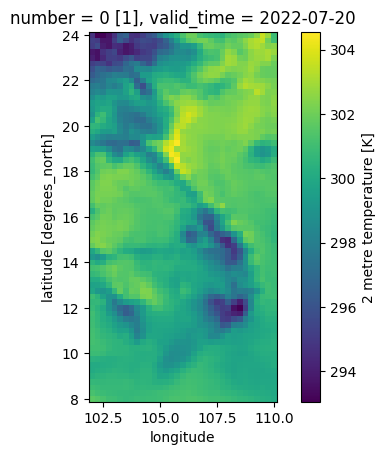

In [5]:
era5["2m_temperature"].isel(valid_time=200).plot().axes.set_aspect("equal")

In [6]:
# weighted_temp = era5.zonal_daily("2m_temperature") -- This will take a while, comment out to run for entire year!
# weighted_temp.data.to_parquet("VNM-2-era5.2m_temperature.daily_mean.parquet", index=False) -- save generated dataset

In [7]:
from datetime import date
# Compare with unweighted data to see difference
unweighted_temp = era5.zonal_daily("2m_temperature", weighted=False, min_date = date(2022,1,1), max_date=date(2022,2,1))
unweighted_temp.weighted

/Users/abhidg/ghq/github.com/kraemer-lab/geoglue/.venv/lib/python3.13/site-packages/exactextract/exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
/Users/abhidg/ghq/github.com/kraemer-lab/geoglue/src/geoglue/era5.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out, df])
/Users/abhidg/ghq/github.com/kraemer-lab/geoglue/.venv/lib/python3.13/site-packages/exactextract/exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
/Users/abhidg/ghq/github.com/kraemer-lab/geoglue/.venv/lib/python3.13/site-packages/exactextract/exact_extract.py:330: RuntimeWarning: Spatial referenc

False

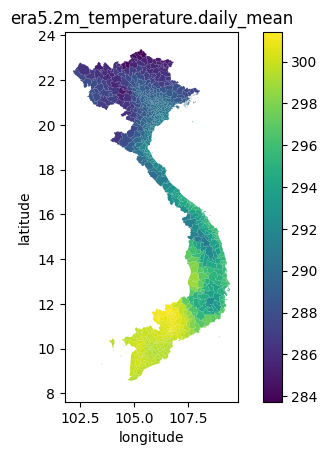

In [8]:
unweighted_temp.plot("2022-01-21")

In [9]:
weighted_temp = ERA5Aggregated.load("VNM-2-era5.2m_temperature.daily_mean.parquet")

In [10]:
weighted_values = weighted_temp.select_values("2022-01-21")
weighted_values

0      299.681669
1      299.755821
2      299.823966
3      300.214452
4      300.051126
          ...    
705    287.911505
706    286.452491
707    287.390631
708    288.232986
709    288.584051
Name: value, Length: 710, dtype: float64

In [11]:
unweighted_values = unweighted_temp.select_values("2022-01-21")
unweighted_values

0      299.680430
1      299.755556
2      299.818588
3      300.104583
4      300.029082
          ...    
705    287.680080
706    286.080355
707    287.209264
708    288.237559
709    288.433252
Name: value, Length: 710, dtype: float64

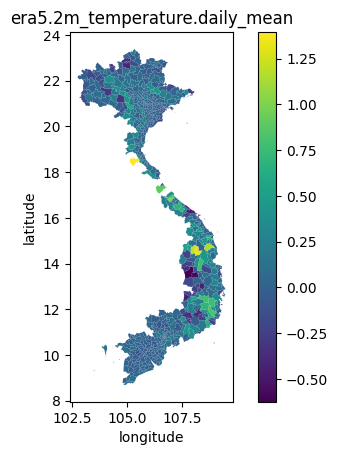

In [12]:
difference_weighted_unweighted = weighted_temp.select("2022-01-21").reset_index(drop=True)
difference_weighted_unweighted["value"] = weighted_values - unweighted_values
weighted_temp.with_data(difference_weighted_unweighted).plot("2022-01-21")

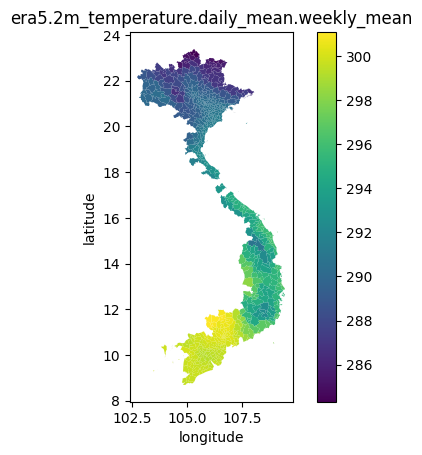

In [13]:
weighted_temp.weekly().plot("2022-W02")